<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Inferred-s-and-mu-values" data-toc-modified-id="Inferred-s-and-mu-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inferred s and mu values</a></span></li></ul></li><li><span><a href="#Autosomal-and-allosomal-mutation-rates-(Figure-5b)" data-toc-modified-id="Autosomal-and-allosomal-mutation-rates-(Figure-5b)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Autosomal and allosomal mutation rates (Figure 5b)</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [17]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np

In [5]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [13]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [21]:
mLOY_color='#243161'
mLOX1_color = '#00a65c'
mLOX2_color = '#bc88ba'

# Import data

## Inferred s and mu values

In [26]:
#s and mu values inferred from MLE - for individual autosomal mCAs
single_mCA_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
single_mCA_s_mu = single_mCA_s_mu.set_index('mCA')
single_mCA_s_mu = single_mCA_s_mu.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
single_mCA_s_mu_dict = pd.DataFrame.to_dict(single_mCA_s_mu, orient = 'index')

In [25]:
#s and mu values inferred from MLE - for X and Y chromosomes
X_Y_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs_chromosome_X_and_Y_biobank.txt', sep = '\t')
X_Y_s_mu = X_Y_s_mu.set_index('mCA')
X_Y_s_mu = X_Y_s_mu.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
X_Y_s_mu_dict = pd.DataFrame.to_dict(X_Y_s_mu, orient = 'index')

# Autosomal and allosomal mutation rates (Figure 5b)

In [24]:
mutation_rates = {}
for k, v, in single_mCA_s_mu_dict.items():
    mutation_rates[k]=(v['mu'], v['lower_95_mu'], v['upper_95_mu'], v['s'])
    
for k, v, in X_Y_s_mu_dict.items():
    mutation_rates[k]=(v['mu'], v['lower_95_mu'], v['upper_95_mu'], v['s'])
    
mutation_rates_sorted = {k: v for k, v in sorted(mutation_rates.items(), key=lambda item: item[1][0])}

number of autosomes =  105
mean of violin plot =  1.3923609523809522e-09
min of violin plot =  4.56e-11
max of violin plot =  5.97e-09


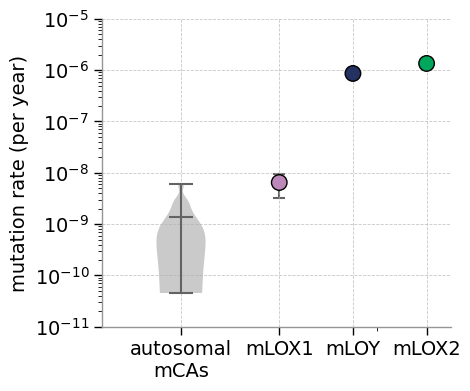

In [23]:
#plot the autosomal and allosomal mutation rates
fig, ax1 = plt.subplots(figsize = (4.5, 4))

autosomes = []
x = []
y = []
lower_err = []
upper_err = []
colors = []

n = 2
for mCA, mutation_rates in mutation_rates_sorted.items():
    if mCA[:2] in ['X-', 'Y-']:
        x.append(n)
        y.append(mutation_rates[0])
        lower_err.append(mutation_rates[0]-mutation_rates[1])
        upper_err.append(mutation_rates[2]-mutation_rates[0])
        if mCA[0]=='Y':
            colors.append(mLOY_color)
        if mCA[-1]=='2':
            colors.append(mLOX2_color)
        if mCA[-1]=='1':
            colors.append(mLOX1_color)
        n+=0.75
    else:
        autosomes.append(mutation_rates[0])
        
errors_list = [tuple(lower_err), tuple(upper_err)]

print('number of autosomes = ', len(autosomes))
print('mean of violin plot = ', np.mean(autosomes))
print('min of violin plot = ', min(autosomes))
print('max of violin plot = ', max(autosomes))

violin = ax1.violinplot(autosomes, showmeans = True)
ax1.scatter(x, y, zorder = 50, s = 125, lw = 1, edgecolor = 'k', alpha = 1.0, color = colors)
ax1.errorbar(x, y, yerr = errors_list, ls='none', zorder = 0, ecolor = grey4, elinewidth = 1.5, capsize = 4, capthick = 1.5)

for pc in violin['bodies']:
    pc.set_facecolor(grey3)
    pc.set_alpha(0.5)
    
for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = violin[partname]
    vp.set_edgecolor(grey4)
    vp.set_linewidth(1.5)

ax1.set_xlim(0.2, 3.75)
ax1.set_ylim(1e-11, 1e-5)
ax1.set_yscale('log')
plt.yticks(fontsize = 14)
ax1.set_ylabel('mutation rate (per year)')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))

x_major_ticks = [1, 2, 2.75, 3.5]
x_major_tick_labels = ["autosomal\nmCAs", "mLOX1", "mLOY", "mLOX2"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 14)

plt.grid(zorder = 0)

ax1.set_yscale('log')

# plt.savefig('Figures/Mutation_rates_autosomes_allosomes.pdf')